# 機械学習　効果測定　回帰(Linear Regression)
#### ●選択データ：diabetes.csv
#### ●回帰で選択したモデル：線形回帰(Linear Regression)
#### ●線形回帰を選択した理由：  
　　複数の説明変数(特徴量)があり、散布図と相関係数により、強い相関が出にくいデータセットである。重回帰分析により最小二乗法や多項式回帰を試みられるLinear Regressionを選択した。

#### ●以下、【考察】にて検討した内容を記載する

### ◆CSVファイルの読み込みと表示

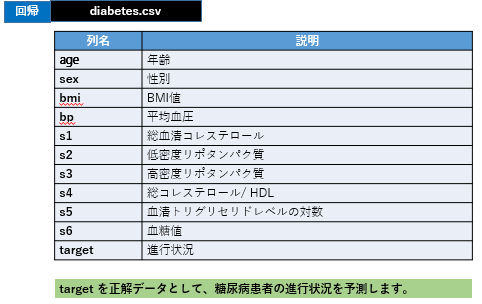

In [1]:
# pandasをインポートして別名をpdとする
# 実装
import pandas as pd

# アップロードしたCSVファイルを読み込んでデータフレームを生成する
# 行数・列数を確認する
df = pd.read_csv('diabetes.csv', encoding = 'UTF-8')
print(df.shape)

(442, 12)


In [2]:
# データフレームの先頭5行を表示する
df.head()

,Unnamed: 0,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### ◆ダミー変数化の判断
####   【考察】：特徴量列にカテゴリ値がないため、ダミー変数化不要と判断する

### ◆正解データの確認
####   正解データは「target」列である。

In [3]:
# target列の値の種類を表示
print(df['target'].unique())

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144. 168.  68.  49. 245. 184. 202. 137.  85. 131. 283.
 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.  61.  92.
 259.  53. 190. 142. 155. 225. 104. 182. 128.  52.  37. 170.  71. 163.
 150. 160. 178.  48. 270. 111.  42. 200. 113. 143.  51. 210. 134.  98.
 164.  96. 162. 279.  83. 302. 198.  95. 232.  81. 246. 297. 258. 229.
 275. 281. 173. 180.  84. 121. 161.  99. 109. 115. 268. 274. 158. 107.
 103. 272. 280. 336. 317. 235.  60. 174. 126. 288.  88. 292. 197. 186.
  25. 195. 217. 172. 214.  70. 220. 152.  47.  74. 295. 127. 237.  64.
  79.  91. 116.  86. 122.  72.  39. 196. 222. 277.  77. 191.  73. 263.
 248. 296.  78.  93. 208. 108. 154. 124.  67. 257. 262. 177. 187. 125.
 215. 303. 243. 153. 346.  89.  50. 308. 145.  45. 264. 241.  66.  94.
 230. 181. 156. 233. 219.  80. 332.  31. 236. 253.  44. 114. 147. 242.
 249. 192. 244. 199. 306. 216. 139. 148.  54. 221. 311. 321.  58. 123.
 167. 

In [4]:
# target列の値のデータの出現回数を表示
print(df['target'].value_counts())

200.0    6
72.0     6
90.0     5
178.0    5
71.0     5
        ..
73.0     1
222.0    1
86.0     1
79.0     1
57.0     1
Name: target, Length: 214, dtype: int64


### ◆正解データとそれ以外のデータの関連を俯瞰する

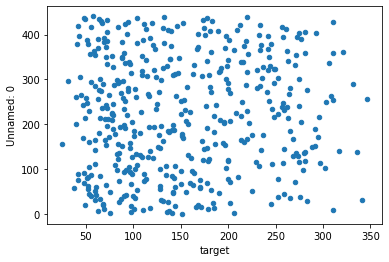

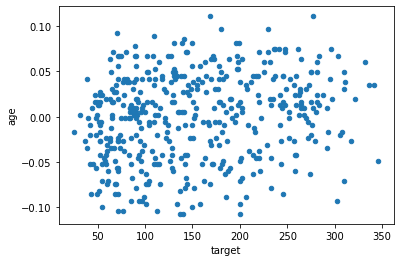

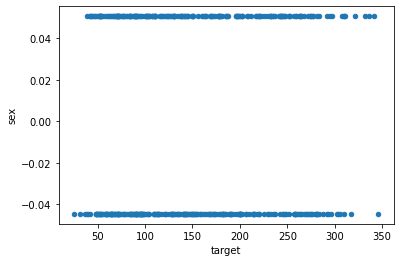

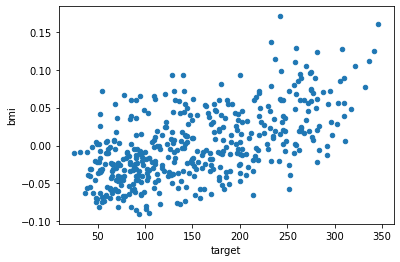

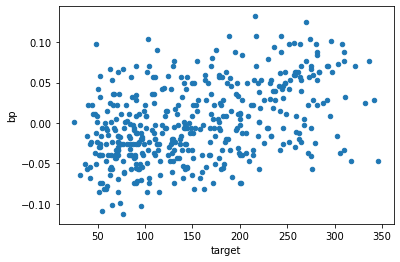

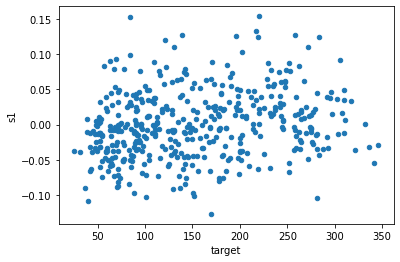

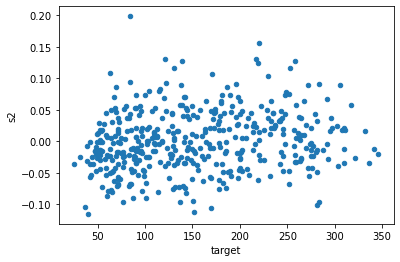

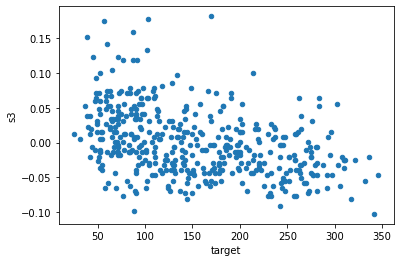

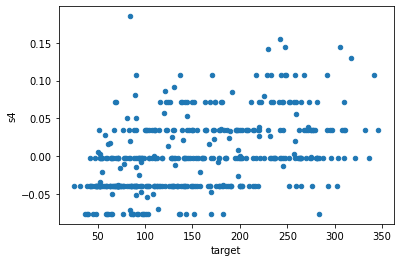

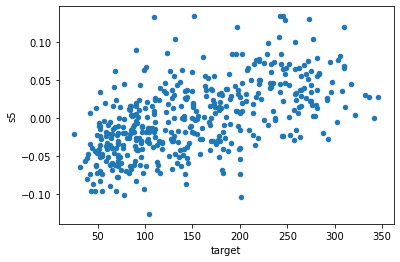

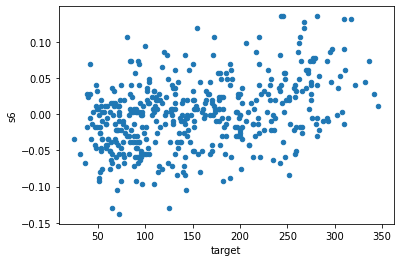

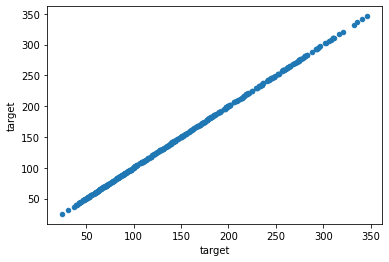

In [5]:
# 散布図を使い、外れ値を探す
# 【考察】：散布図からは、外れ値と明言できる値が見つからない
#  　　　　まずは外さずに機械学習をさせ、あとで外れ値を除去する
# 【考察】：散布図より、強い相関をもつ特徴量は見つからない

colname = df.columns
for name in colname:
  df.plot(kind ='scatter',x = 'target', y = name )

In [6]:
# corr関数で、相関係数マトリックスを表示する
# 【考察】：相関係数で見ても、強い相関を示す列はない
#　　　　　 この中では、「bmi」「s5」「bp」「s4」の順で相関が強い
df.corr()['target']

Unnamed: 0    0.059912
age           0.187889
sex           0.043062
bmi           0.586450
bp            0.441484
s1            0.212022
s2            0.174054
s3           -0.394789
s4            0.430453
s5            0.565883
s6            0.382483
target        1.000000
Name: target, dtype: float64

### ◆欠損値の有無を確認する

In [7]:
# データフレームの全体の欠損値の有無を確認する
print('データフレーム全体の欠損値 = ',df.isnull().sum().sum())

データフレーム全体の欠損値 =  0


In [8]:
print('【考察】：欠損値がないため、欠損値処理不要と確認する')

【考察】：欠損値がないため、欠損値処理不要と確認する


### ◆特徴量を変数xに代入してデータフレームを作成する
#### 特徴量は、目的変数(正解データ)の「target」列と、先頭の「unnamed」列を除外する

In [9]:
# 特徴量の抽出
x = df.iloc[:,1:-1]
# 特徴量の先頭の3行を表示
x.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930


### ◆目的変数(正解データ)の「target」列を変数tに代入してデータフレームを作成する

In [10]:
# 目的変数(正解データ)の抽出
t = df.loc[:,'target']
# 目的変数(正解データ)の先頭の3行を表示
t.head(3)


0    151.0
1     75.0
2    141.0
Name: target, dtype: float64

### ◆訓練データとテストデータの分割
#### 訓練データを7割、テストデータを3割に分割する

In [11]:
# train_test_split関数のインポート
from sklearn.model_selection import train_test_split
# 訓練データとテストデータに分割
x_train, x_test, y_train, y_test = train_test_split(x, t,test_size = 0.3, random_state = 0)

### ◆分割した訓練データ、テストデータの行数と列数を表示し
### 正しく分割されたか確認する


In [12]:
# 訓練データの行数と列数を表示
lx = x_train.shape
print('x_train:行数 = ',lx[0],'、','列数 = ',lx[1])
# テストデータの行数と列数を表示
ly = x_test.shape
print('x_test:行数 = ',ly[0],'、','列数 = ',ly[1])

print('訓練データとテストデータが、7:3の比率で分割されている')

x_train:行数 =  309 、 列数 =  10
x_test:行数 =  133 、 列数 =  10
訓練データとテストデータが、7:3の比率で分割されている


### ◆モデルの準備と、学習の実行
#### 線形回帰(Linear Regression)モデルを準備して、学習を実行する

In [13]:
# LinearRegression(線形回帰)のライブラリをインポート
from sklearn.linear_model import LinearRegression

# モデルの初期化、学習を行う
model = LinearRegression()

# 学習データを使った学習（ fit : trainデータを使って、学習）
model.fit(x_train, y_train)

trainscore = model.score(x_train, y_train)
# 作成したモデルに対し、訓練データを使って精度を確かめる
test_score = model.score(x_test, y_test)

print('学習データの学習結果：',trainscore)
print('テストデータの学習結果：',test_score)


学習データの学習結果： 0.5539411781927147
テストデータの学習結果： 0.3928939845074757


### ◆正解率を上げるための試行錯誤
#### ・外れ値の除外
#### ・特徴量エンジニアリング
#### ・多項式特徴量

In [14]:
# 散布図を参考にし、外れ値を除外する
# 外れ値のインデックスを特定する
outlier_s2 = df[(df['s2']) > 0.19]
outlier_s4_1 = df[(df['s2']) > 0.16]
outlier_s4_2 = df[(df['s4'] < -0.05) & (df['target'] > 250) ]
outlier_s5 = df[(df['s5'] < -0.10) & (df['target'] > 100) ]
outlier_bmi_1 = df[(df['bmi'] > 0.15)]
outlier_bmi_2 = df[(df['bmi'] < -0.05) & (df['target'] > 250)]
outlier_bp = df[(df['bp'] > 0.09) & (df['target'] < 50)]

print('s2の外れ値：',outlier_s2.index)
print('s4_1の外れ値：',outlier_s4_1.index)
print('s4_2の外れ値：',outlier_s4_2.index)
print('s5の外れ値：',outlier_s5.index)
print('bmi_1の外れ値：',outlier_bmi_1.index)
print('bmi_2の外れ値：',outlier_bmi_2.index)
print('bpの外れ値：',outlier_bp.index)

s2の外れ値： Int64Index([123], dtype='int64')
s4_1の外れ値： Int64Index([123], dtype='int64')
s4_2の外れ値： Int64Index([29], dtype='int64')
s5の外れ値： Int64Index([110, 387], dtype='int64')
bmi_1の外れ値： Int64Index([256, 367], dtype='int64')
bmi_2の外れ値： Int64Index([78], dtype='int64')
bpの外れ値： Int64Index([92], dtype='int64')


In [15]:
# 外れ値を除去したデータフレームを作成する
x2 = x.drop([123,29,110,387,367,92,78,256],axis = 0)
t2 = t.drop([123,29,110,387,367,92,78,256],axis = 0)

x2.shape

(434, 10)

【考察】：特徴量の絞り込みとして、相関係数の低い「sex」「age」「s2」「s1」を除外して学習させるパターンも試したが、スコアは上がらなかった。

In [16]:
#特徴量エンジニアリング
#「bmi」「s5」「bp」「s4」の順で相関が強い
#多項式特徴量でチューニング
#x2['bmi_3乗'] = x2['bmi'] ** 3  #決定係数： 0.5411300506976737
#x2['s5_3乗'] = x2['s5'] ** 3  #決定係数：0.5500184075115764
#x2['bp_3乗'] = x2['bp'] ** 3  #決定係数：0.5422987746380532
#x2['s4_3乗'] = x2['s4'] ** 3  #決定係数： 0.5400942729505791

#交互作用特徴量でチューニング
#x2['bmi* s5'] = x2['bmi'] * x2['s5'] #決定係数：0.54390393465645
x2['bmi* bp'] = x2['bmi'] * x2['bp'] #決定係数：0.5556379643656358 ★一番
#x2['bmi* s4'] = x2['bmi'] * x2['s4'] #決定係数：0.5440888912847214
#x2['bmi* s5_3乗'] = x2['bmi'] * x2['s5_3乗'] #決定係数：0.5502066446859766
#x2['bp* s4'] = x2['bp'] * x2['s4'] #決定係数：0.541443775830222
#x2['bmi_3乗* bp_3乗'] = x2['bmi_3乗'] * x2['bp_3乗'] #決定係数：0.5413031085952446

# 訓練データとテストデータに分割
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, t2,test_size = 0.3, random_state = 234)
x2.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,bmi* bp
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,0.001349
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,0.001355


In [17]:
# モデルの初期化、学習を行う
model2= LinearRegression()

# 学習データを使った学習（ fit : trainデータを使って、学習）
model2.fit(x2_train, y2_train)

trainscore = model2.score(x2_train, y2_train)
# 作成したモデルに対し、訓練データを使って精度を確かめる
test_score = model2.score(x2_test, y2_test)

print('学習データの学習結果：',trainscore)
print('テストデータの学習結果：',test_score)

学習データの学習結果： 0.5513595198424559
テストデータの学習結果： 0.5176459705781418


### ◆Predictでモデルを使って予測する
#### あまり精度は良くない。もう少し正解率を上げたい

In [18]:
print(x2[:1])
model2.predict(x2[:1])

        age      sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.05068  0.061696  0.021872 -0.044223 -0.034821 -0.043401   

         s4        s5        s6   bmi* bp  
0 -0.002592  0.019908 -0.017646  0.001349  


array([203.61689939])

### ◆ほかの回帰モデルを試す  (ラッソ回帰→回帰木→SVM)
##### ●ラッソ回帰を選択した理由： 
　　線形回帰の試行錯誤で、相関の低い列(特徴量)を除外しても、良いスコアにならなかったため、予測に役立たない特徴量を学習中に削除できるラッソ回帰を選択した

##### ●【考察】：alphaで正規化項の定数を調整すると、0.0001まで数を小さくした方がスコアが上がった。それでもこれまでの回帰モデルの係数よりスコアが上がらない

In [19]:
# Lassoのライブラリをインポート
from sklearn.linear_model import Lasso

# モデルの初期化、学習を行う
model3 = Lasso(alpha = 0.0001)

# データセットは外れ値を除外したx2,t2を利用する
# 訓練データとテストデータに分割
x3_train, x3_test, y3_train, y3_test = train_test_split(x2, t2,test_size = 0.3, random_state = 234)

# 学習データを使った学習（ fit : trainデータを使って、学習）
model3.fit(x3_train, y3_train)
trainscore = model3.score(x3_train, y3_train)

# 作成したモデルに対し、訓練データを使って精度を確かめる
test_score = model3.score(x3_test, y3_test)

print('学習データの学習結果：',trainscore)
print('テストデータの学習結果：',test_score)


学習データの学習結果： 0.551358763924378
テストデータの学習結果： 0.5175413796337494


##### ●回帰木を選択した理由： 
　　線形回帰の試行錯誤で、決定的な特徴量が見つからなかったため、分類を繰り返し多数決をとる回帰モデルを利用してみた

##### ●【考察】：階層の深さ(max_depth)を10まで上げると0.91までスコアが上がるが、教師データとテストデータでスコアに大きな差がでるため過学習を起こしていると推察できる。ちょうどよい深さは3であり、そのスコアは0.57であった。

In [20]:
# 回帰木のライブラリをインポート
from sklearn.tree import DecisionTreeRegressor

# モデルの初期化、学習を行う
model4 = DecisionTreeRegressor(max_depth = 3, random_state =0)

# 学習データを使った学習（ fit : trainデータを使って、学習）
model4.fit(x3_train, y3_train)
trainscore = model4.score(x3_train, y3_train)

# 作成したモデルに対し、訓練データを使って精度を確かめる
test_score = model4.score(x3_test, y3_test)

print('学習データの学習結果：',trainscore)
print('テストデータの学習結果：',test_score)

学習データの学習結果： 0.5720472821909096
テストデータの学習結果： 0.4606583297652972


##### ●SVMを選択した理由： 
　　回帰木で良いスコアが出たので、分類でも回帰でも使えるSVMでチャレンジしてみる

##### ●【考察】：全くスコアが良くないので、このモデルは分析に不向きと判断する。

In [21]:
# SVMのライブラリの読み込み
from sklearn.svm import LinearSVC

# モデルの初期化、学習を行う
model5 = LinearSVC()

# 学習データを使った学習（ fit : trainデータを使って、学習）
model5.fit(x3_train, y3_train)

trainscore = model5.score(x3_train, y3_train)
# 作成したモデルに対し、訓練データを使って精度を確かめる
test_score = model5.score(x3_test, y3_test)

print('学習データの学習結果：',trainscore)
print('テストデータの学習結果：',test_score)

学習データの学習結果： 0.15181518151815182
テストデータの学習結果： 0.007633587786259542


##### ●累乗列と交互作用特徴量で、多項式処理で、良い交差特徴量が出ないか試してみる

##### ●【考察】：交差特徴量で、線形回帰し、0.64までスコアが上がるが、テストデータのスコアと乖離があり、良い学習結果ではないと判断
　　　　　　交差特徴量で、線形回帰しても良いスコアがでないと確認できた

In [22]:
# 累乗列と交互作用特徴量で、多項式処理で、良い交差特徴量が出ないか試してみる
from sklearn.preprocessing import PolynomialFeatures

# モデルの初期化、学習を行う
pf = PolynomialFeatures(degree = 2, include_bias = False)
pf_x = pf.fit_transform(x2)

# 訓練データとテストデータに分割
x4_train, x4_test, y4_train, y4_test = train_test_split(pf_x, t2,test_size = 0.3, random_state = 234)

# 線形回帰
model6= LinearRegression()

# 学習データを使った学習（ fit : trainデータを使って、学習）
model6.fit(x4_train, y4_train)

trainscore = model6.score(x4_train, y4_train)
# 作成したモデルに対し、訓練データを使って精度を確かめる
test_score = model6.score(x4_test, y4_test)

print('学習データの学習結果：',trainscore)
print('テストデータの学習結果：',test_score)

学習データの学習結果： 0.6405167329615771
テストデータの学習結果： 0.18454491440471033


### ◆モデルを保存する
#### 【考察】：様々な回帰分析をした結果、線形回帰(model2)と回帰木(model4)のスコアが良かったため、モデルとして保存する

In [23]:
import pickle

# モデルを保存
# 実装
with open('kouka_kaiki(LinearRegression)_diabetes.pkl', 'wb') as f:
  pickle.dump(model2, f)

In [24]:
import pickle

# モデルを保存
# 実装
with open('kouka_kaiki(DecisionTree)_diabetes.pkl', 'wb') as f:
  pickle.dump(model4, f)